# Laboratory exercise 2

##### By: Angela Madjar, 181010

In this laboratory exercise I will be working with the suggested California Housing dataset available on the following link: https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv .

I first did a research about the meaning of each of the attributes.

Attributes: <br>
**longitude**: A measure of how far west a house is (a higher value is farther west). <br>
**latitude**: A measure of how far north a house is (a higher value is farther north). <br>
**housingMedianAge**: Median age of a house within a block (a lower number is a newer building). <br>
**totalRooms**: Total number of rooms within a block. <br>
**totalBedrooms**: Total number of bedrooms within a block. <br>
**population**: Total number of people residing within a block. <br>
**households**: Total number of households, a group of people residing within a home unit, for a block. <br>
**medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars). <br>
**medianHouseValue**: Median house value for households within a block (measured in US Dollars).

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
import warnings
warnings.filterwarnings("ignore")

### 1. Getting to know the dataset

We will first load the California Housing dataset.

In [5]:
df = pd.read_csv("california_housing_train.csv")

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [5]:
nRows, nCols = df.shape
print(f'This dataset has {nRows} rows and {nCols} columns')

This dataset has 17000 rows and 9 columns


Checking the type of the attributes and the number of non-null values. <br>
We notice that every attribute is numerical (float) and there aren't any null values since the number of non-null values for every attribute is equal to the number of rows in the dataset. <br> Therefore, understanding that there won't be handling of missing or categorical data, facilitates our job.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Confirmation of the above conclusion.

In [7]:
total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()
(total_missing/total_cells)*100

0.0

Also, there aren't any duplicate rows in this dataset.

In [9]:
print(df.duplicated().any())

False


Data uniqueness per column.

In [55]:
df.nunique()

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

In [10]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

### 2. Visualizations

#### 2.1. Heatmap

(Positive) Correlation between the attributes: <br>
1. The number of bedrooms is highly correlated with the number of rooms, which makes a lot of sense.
2. The total number of households that live in one house is highly correlated with the total number of rooms (the more people   in the household, the higher the number of rooms). The same counts for the number of bedrooms.
3. The population is also highly correlated to the total number of rooms and the total number of bedrooms.
4. The number of households is highly correlated with the number of people living in a block.
5. The value of the houses in a block is highly correlated to the median income of the households living in that block. In other words: the richer the people, the more expensive the houses they live in.

(Negative) Correlation between the attributes:<br>
1. Of course, the latitude is highly correlated to the longitude.

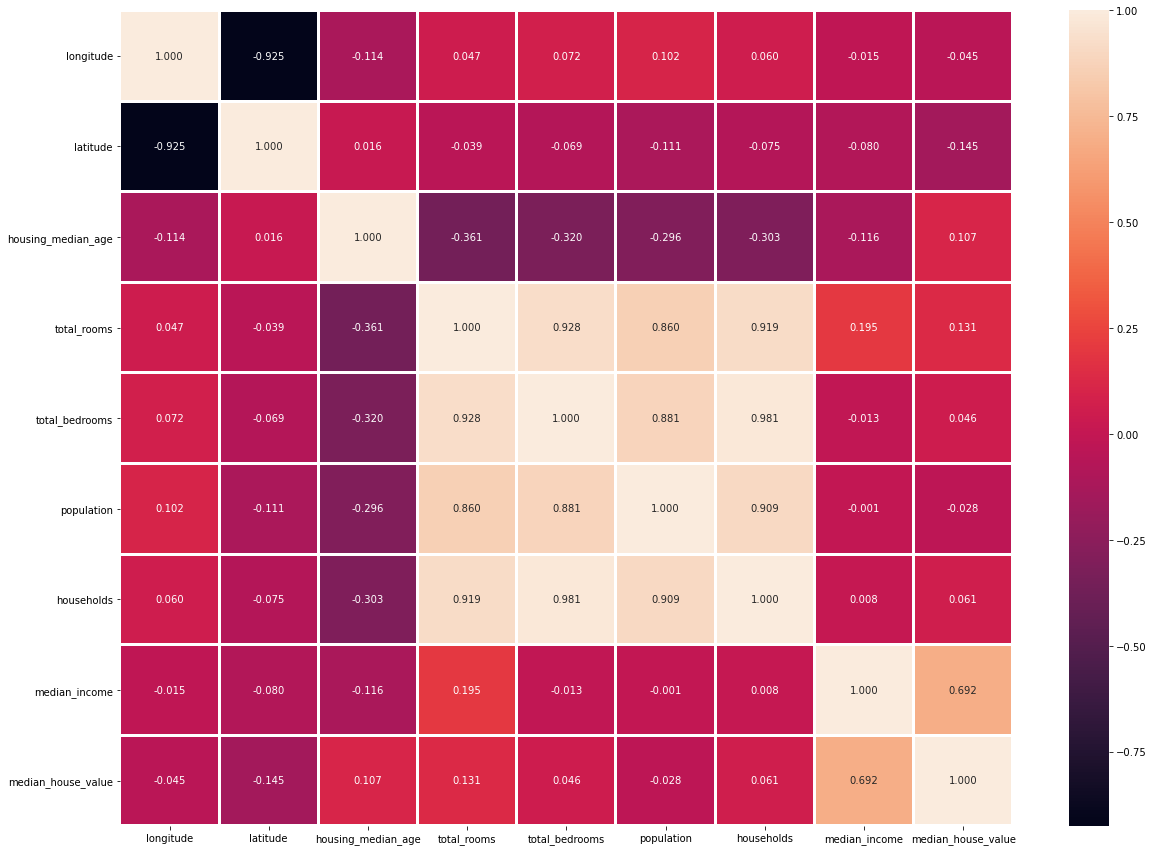

In [16]:
%matplotlib inline

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.3f', linewidths=2)
plt.show()

#### 2.2. Pairplots

As we already concluded from the heatmap, the attribute household is linearly dependent with the attributes: total rooms, total bedrooms, population. Meaning, the bigger the household - the bigger the population and the larger the number of rooms and bedrooms. <br>

The attribute population is also linearly dependent with the attributes: total rooms, total bedrooms and household. <br>

Although there are some outliers, we can also notice that the house value increases with the income of the households. <br>

On the pairplot we can visually see the inverse linearity of the longitude and the latitude. <br>

I thought that the house age might have something to do with the value, but I was wrong.

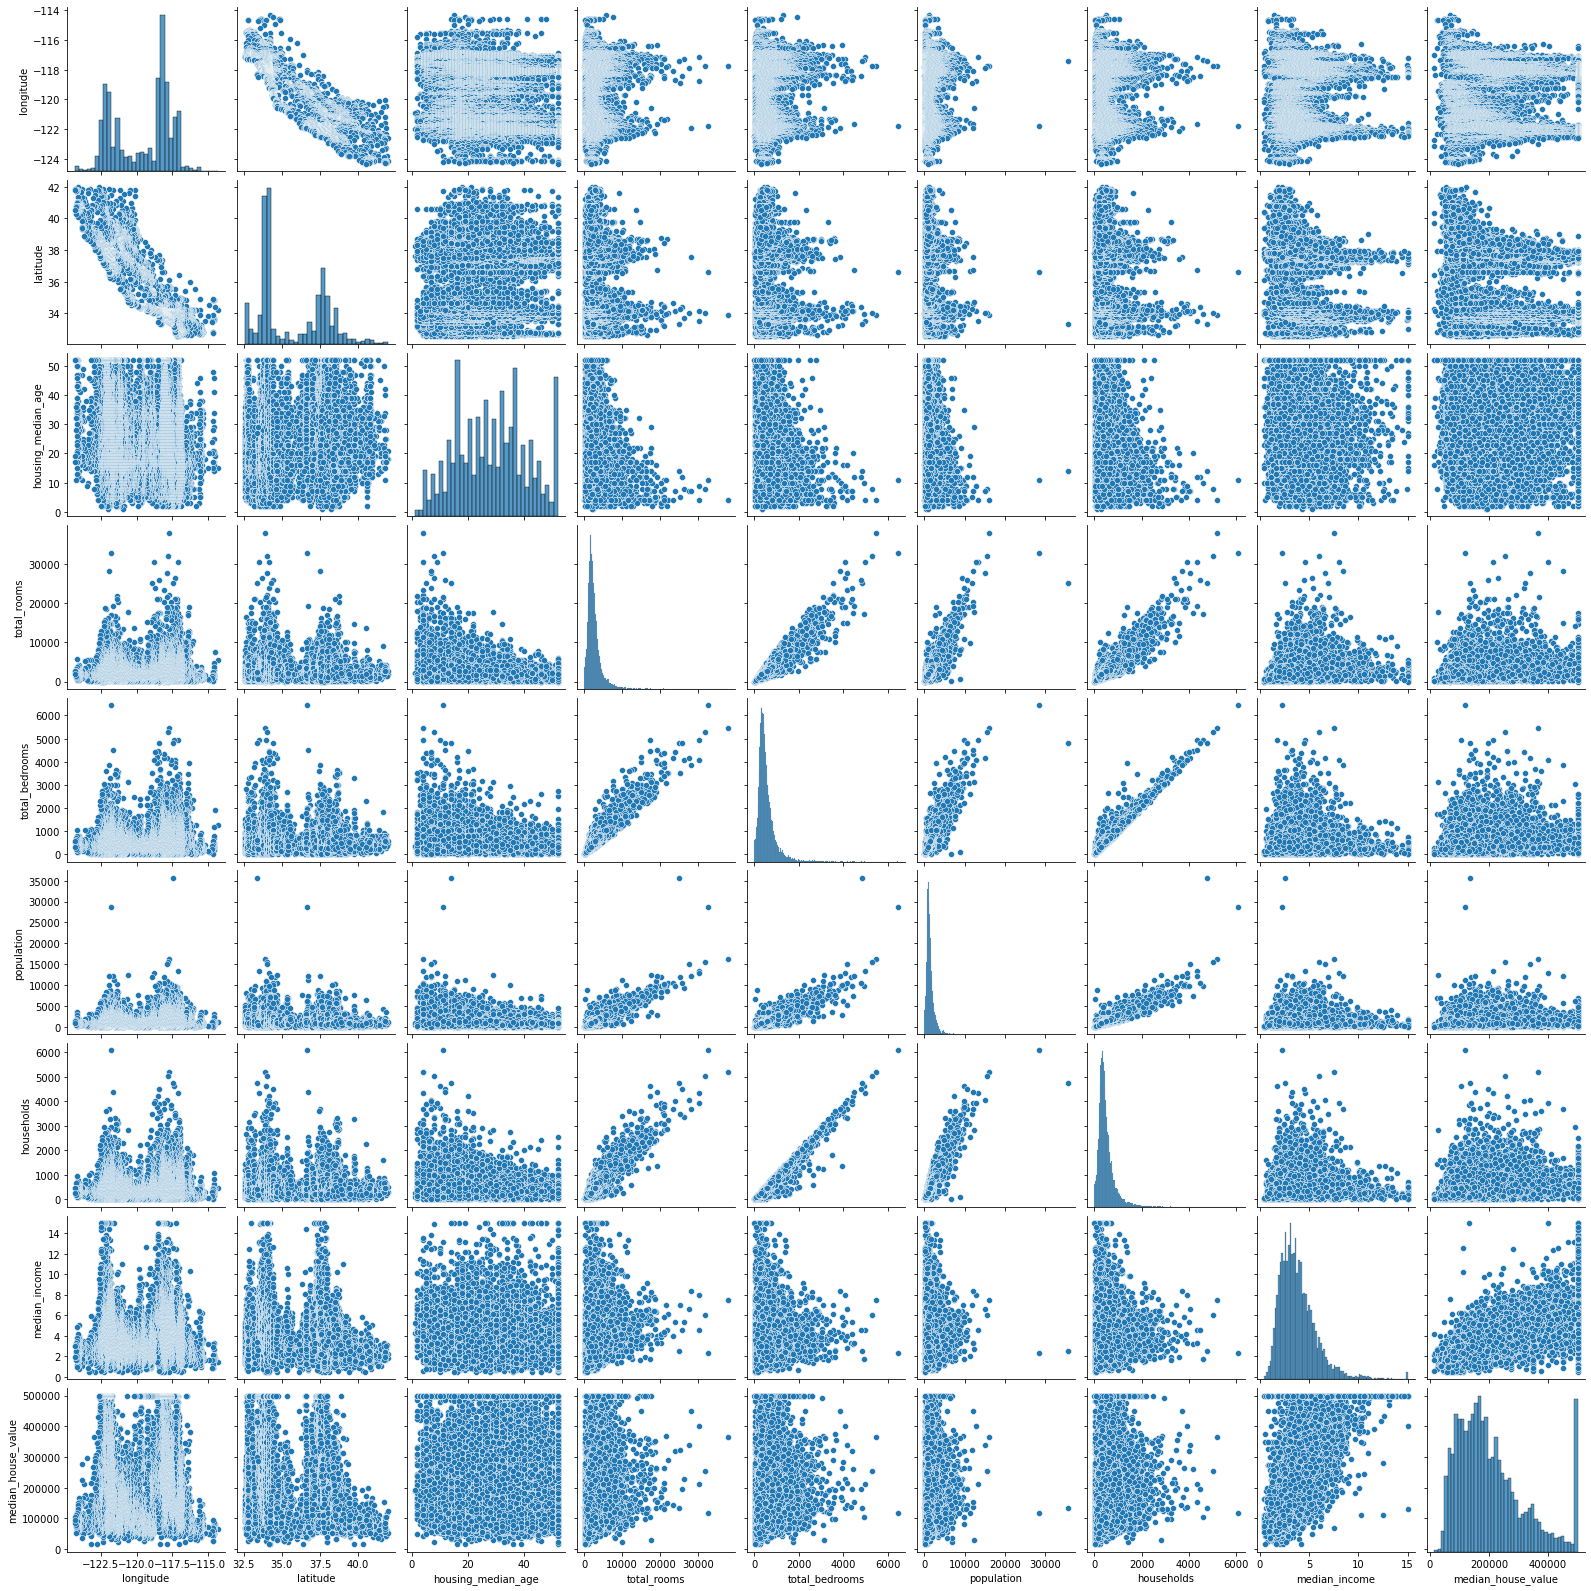

In [40]:
sns.pairplot(df)

Plotting only the linearly dependent attributes in order to understand their relation to the target variable.

Pairplot segregated on Median House Value


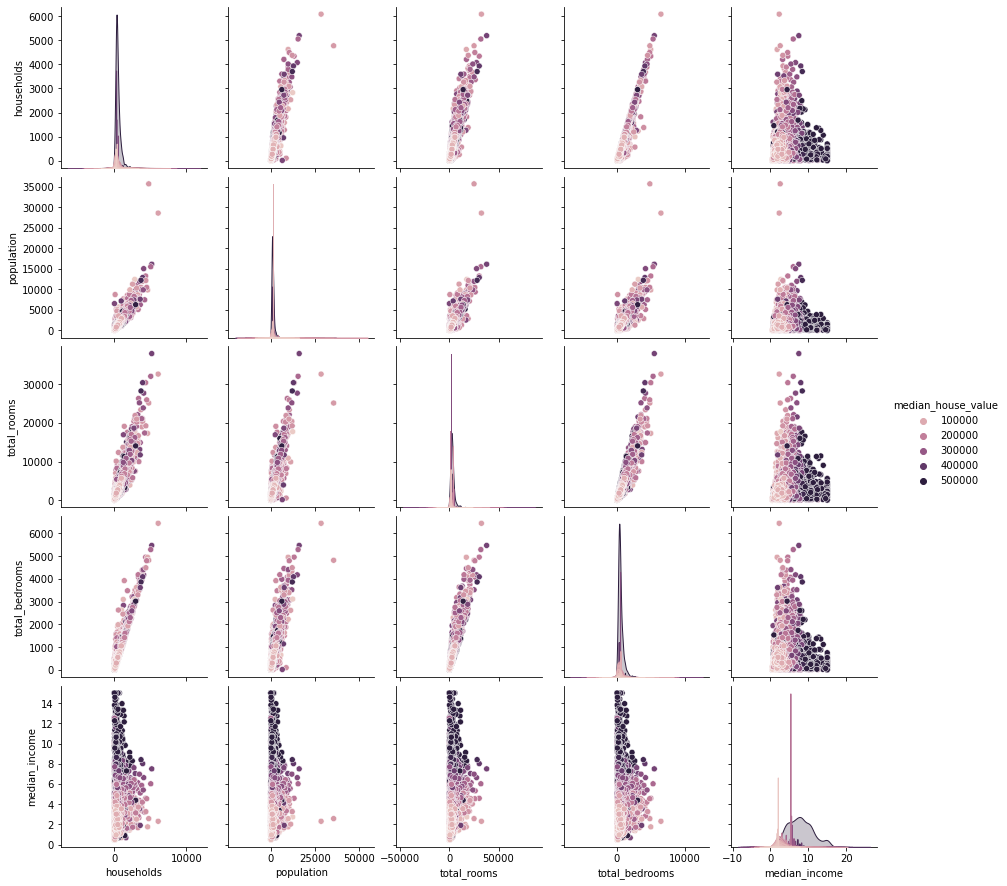

In [67]:
sns.pairplot(data = df[['households', 'population', 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value']], hue='median_house_value')
print('Pairplot segregated on Median House Value')
plt.show()

#### 2.3. Plotting the relations between the **Median Income** and the **Median House Value**

When plotting the median income against the median house value, we notice there are some outliers. We will explore these outliers in detail using a boxplot.

Median House Value based on Median Income


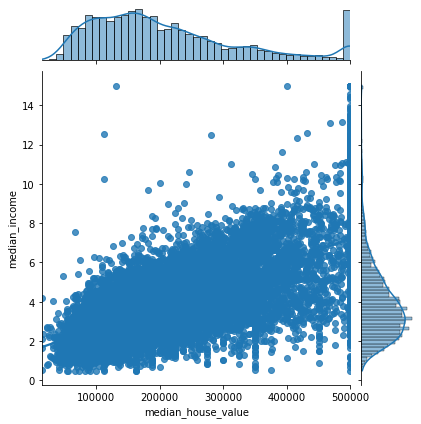

In [69]:
sns.jointplot(data=df, x="median_house_value", y="median_income", kind="reg")
print("Median House Value based on Median Income")

plt.show()

##### 2.3.1. Ourliers

Exploring the outliers with the IQR.<br>

To compute the IQR, we need to know which house values correspond to the 25th percentile (higher value than 25% of the house values in the dataset) and to the 75th percentile (higher value than 75% of the house values in the dataset). <br>

To achieve this, first sort your dataset by ascending temperature, and reset the indices.

In [100]:
df_sorted = df.copy()
df_sorted = df_sorted.sort_values(by='median_house_value').reset_index(drop=True)

Computing the lower and upper quantile.

In [103]:
Q25 = df_sorted['median_house_value'].quantile(0.25)
Q25

119400.0

In [104]:
Q50 = df_sorted['median_house_value'].quantile(0.50)
Q50

180400.0

In [106]:
Q75 = df_sorted['median_house_value'].quantile(0.75)
Q75

265000.0

Computing the Interquantile range (the difference between the 25th and the 75th percentile)

In [108]:
from scipy.stats import iqr

IQR = iqr(df_sorted['median_house_value'])
IQR

145600.0

Computing the lower and upper bound. <br>

I got a negative value for the lower bound, but the attribute median_house_value is a positive attribute. <br>
After some research, I read that in this case, the lower bound should be replaced with 0. <br>
 
Anything outside the lower bound and the upper bound is an outlier.

In [111]:
lower_bound = Q25 -(1.5 * IQR) 
upper_bound = Q75 +(1.5 * IQR) 
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

Lower bound: -99000.0
Upper bound: 483400.0


Plotting the 25th, 50th and 75th percentile of the data.

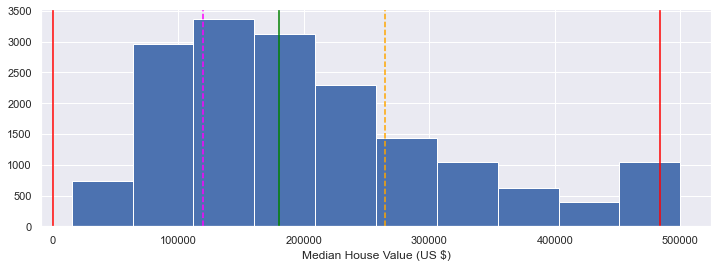

In [115]:
plt.figure(figsize=(12,4))
plt.hist(df_sorted['median_house_value'])
plt.xlabel("Median House Value (US $)")

# Vertical lines for each percentile of interest
plt.axvline(Q25, linestyle='--', color='magenta')
plt.axvline(Q50, linestyle='-',  color='green')
plt.axvline(Q75, linestyle='--', color='orange')

#Lower and upper bound
plt.axvline(0, linestyle='-', color='red')
plt.axvline(upper_bound, linestyle='-',  color='red')

plt.show()

##### 2.3.2. Dealing with outliers

In [120]:
(df_sorted['median_house_value'][df_sorted['median_house_value'] > 483400]).count()

895

I tried calculating the mean square error without removing the outliers. The results were worse than calculating it after I removed the outliers. Therefore, I decided to drop the rows in which the median house value is an outlier.

In [145]:
df_sorted.drop(df_sorted[df_sorted['median_house_value'] > 483400].index, inplace = True)

In the visualizations below, I still work with the original dataset. I work with the modified dataset (df_sorted) when I train the Linear Regression model.

#### 2.4. Plotting Spatial Data on California Map

In [32]:
BBox = ((df.longitude.min(), df.longitude.max(),      
         df.latitude.min(),  df.latitude.max()))
print(BBox)

(-124.35, -114.31, 32.54, 41.95)


In [33]:
california_map = plt.imread('open_street_map_California.png')

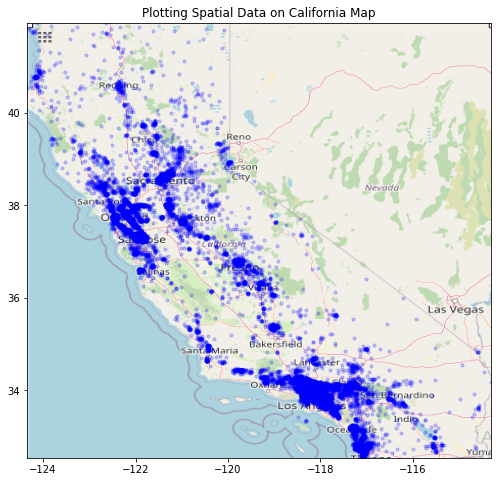

In [34]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(california_map, zorder=0, extent = BBox, aspect= 'equal')

Visualizing the median house value depending on the location.

In [6]:
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='median_house_value', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

#### 2.5. Plotting the relations between Population and Total Number of Bedrooms to understand their relation to the House Values

Text(0.5, 1.0, 'Population based on Total Bedrooms')

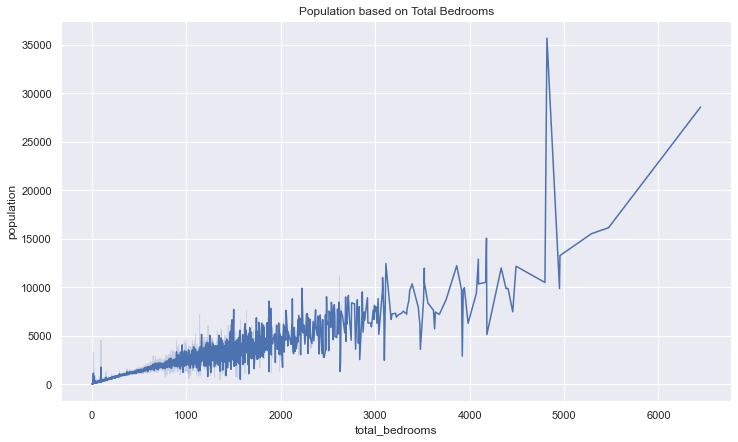

In [86]:
sns.lineplot(y = 'population', x = 'total_bedrooms', data = df)
plt.title('Population based on Total Bedrooms')

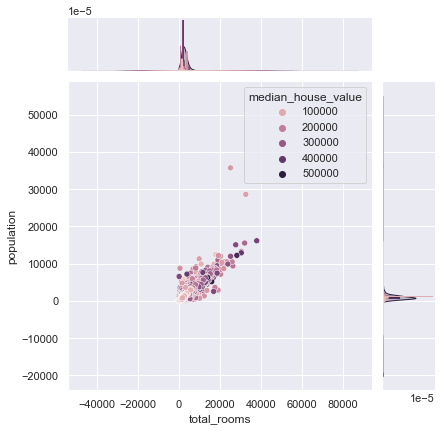

In [83]:
sns.jointplot(data=df, x="total_rooms", y="population", hue="median_house_value")

#### 2.6. Plotting the distribution od the House Age

A lower number is a newer building.

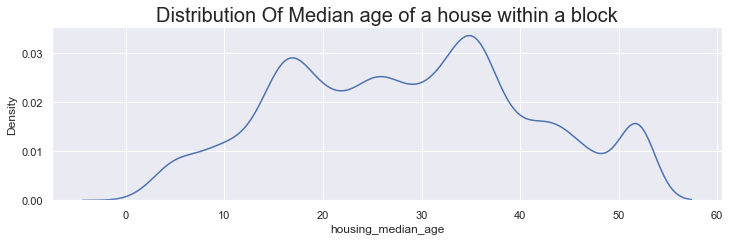

In [78]:
plt.subplot(2,1,1)
plt.title('Distribution Of Median age of a house within a block', fontsize=20)
sns.kdeplot(df['housing_median_age'])
plt.show()

### 3. Linear Regression

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

##### 3.1. Splitting the dataset

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_sorted[df_sorted.columns[:-1]],  df_sorted['median_house_value'], test_size=0.2)

##### 3.2. Scaling the values in the range [0,1]

In [158]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### 3.3. Prediction

In [185]:
model = LinearRegression().fit(X_train, Y_train)

In [186]:
y_pred = model.predict(X_test)
y_pred

array([207484.47044294, 201843.98064147,  61748.82474438, ...,
       246839.64306868,  94882.53828712, 218783.58117193])

##### 3.4. Evaluation

In [187]:
result_df = pd.DataFrame({"actual":Y_test,"predicted":y_pred})
result_df.head()

actual      predicted
9002  187500.0  207484.470443
9720  198600.0  201843.980641
1604   80200.0   61748.824744
8473  179800.0  196291.026816
2175   89000.0  128669.943777

In [191]:
print(f'MSE: {mean_squared_error(Y_test, y_pred)}')

MSE: 3560885086.123894


In [192]:
print(f'MAE: {mean_absolute_error(Y_test, y_pred)}')

MAE: 44615.56502533975


### 4. Regularization - Ridge Regression

In [ ]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.kernel_ridge import KernelRidge

In [180]:
# define model
model = KernelRidge(alpha=0.003, kernel='linear', degree=4, gamma=1, coef0=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# # force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 48498.362 (680.045)


### 5. Regularization - Lasso Regression

In [181]:
from sklearn import linear_model

In [182]:
# define model
model = linear_model.Lasso(alpha=0.1)

# define model evaluation method
cv = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# # force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 44978.298 (639.424)
